### Student Information

Name: 李佳鈺

Student ID: 110006216

GitHub ID: angelineaurelia

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

### 1. Downloading the Dataset

In [1]:
import pandas as pd

# Some dependencies:
# pip install fsspec
# pip install huggingface_hub

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

# Display basic info about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None
       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


### 2. Data Mining using Pandas

#### 2.1 Missing Values

In [2]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

Missing values per column:
sentiment    0
comment      0
dtype: int64


#### 2.2 Dealing with Duplicate Data

In [3]:
# Check for duplicates
duplicate_count = df.duplicated(subset=['comment']).sum()
print(f"Number of duplicate comments: {duplicate_count}")

# Remove duplicates
df = df.drop_duplicates(subset=['comment']).reset_index(drop=True)

# Confirm removal
print(f"Number of comments after removing duplicates: {len(df)}")

Number of duplicate comments: 1
Number of comments after removing duplicates: 1499


### 3. Data Preprocessing

#### 3.1 Sampling

In [4]:
from sklearn.model_selection import train_test_split

# define the sample size
sample_size = 0.2  # 20%

df_sample, _ = train_test_split(df, test_size=(1 - sample_size), stratify=df['sentiment'], random_state=42)

# Confirm the class distribution in the sampled data
print("Class distribution in the original dataset:")
print(df['sentiment'].value_counts(normalize=True))

print("\nClass distribution in the sampled dataset:")
print(df_sample['sentiment'].value_counts(normalize=True))

Class distribution in the original dataset:
sentiment
nostalgia        0.500334
not nostalgia    0.499666
Name: proportion, dtype: float64

Class distribution in the sampled dataset:
sentiment
nostalgia        0.501672
not nostalgia    0.498328
Name: proportion, dtype: float64


#### 3.2 Feature Creation

In [5]:
import nltk
nltk.download('punkt')

def tokenize_text(text):
    return nltk.word_tokenize(text)

# Apply tokenization to create unigrams
df['unigrams'] = df['comment'].apply(tokenize_text)

# Display the updated DataFrame with the unigrams column
print(df[['comment', 'unigrams']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/angelineaurelia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             comment  \
0  He was a singer with a golden voice that I lov...   
1  The mist beautiful voice ever I listened to hi...   
2  I have most of Mr. Reeves songs.  Always love ...   
3  30 day leave from 1st tour in Viet Nam to conv...   
4  listening to his songs reminds me of my mum wh...   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...  
4  [listening, to, his, songs, reminds, me, of, m...  


#### 3.3 Feature Subset Selection

In [6]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Convert text to document-term matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['comment'])  # Fit and transform on comments
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [8]:
# Calculate term frequencies
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
top_term_indices = term_frequencies.argsort()[-20:][::-1]  # Get indices of top 20 terms
top_terms = count_vect.get_feature_names_out()[top_term_indices]

# Sum document frequencies across all terms
top_docs_indices = np.array(X_counts.sum(axis=1)).flatten().argsort()[-20:][::-1]  # Get top 20 docs

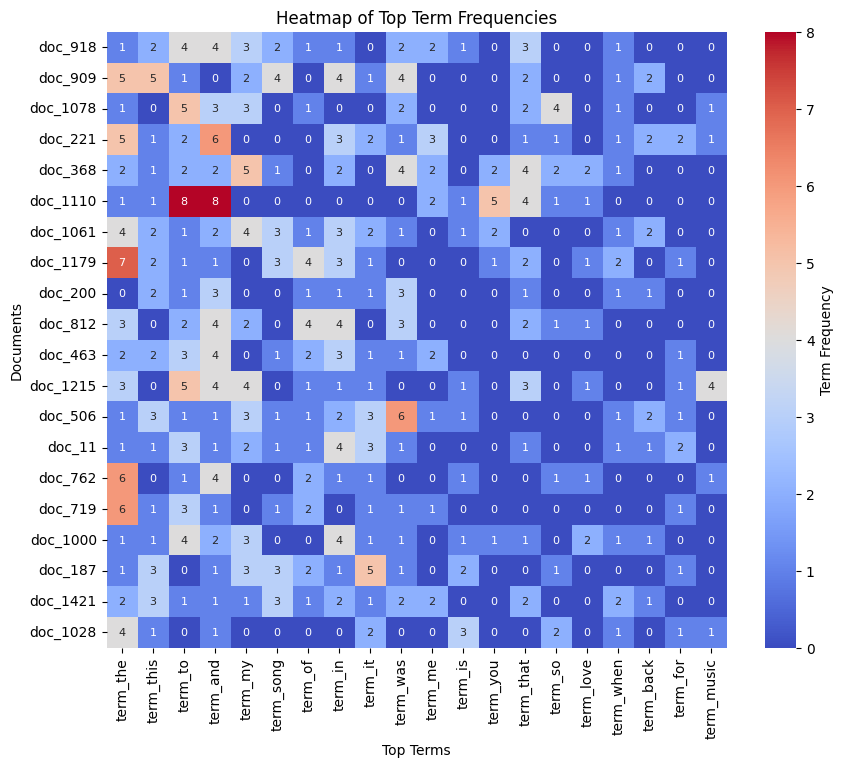

In [9]:
# Create filtered data for visualization
plot_a = X_counts[top_docs_indices, :][:, top_term_indices].toarray()
plot_b = ["term_" + str(i) for i in top_terms]
plot_c = ["doc_" + str(i) for i in top_docs_indices]
df_todraw = pd.DataFrame(plot_a, columns=plot_b, index=plot_c)

# Plot heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    df_todraw,
    cmap="coolwarm",
    vmin=0,
    vmax=np.max(plot_a),
    annot=True,
    fmt="d",
    cbar_kws={'label': 'Term Frequency'},
    annot_kws={'size': 8}
)
plt.title("Heatmap of Top Term Frequencies")
plt.xlabel("Top Terms")
plt.ylabel("Documents")
plt.show()


#### 3.4 Attribute Transformation/Aggregation

In [10]:
import plotly.graph_objects as go
import math

Calculate Term Frequencies

In [11]:
# Sum frequencies of each term across all documents
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()

Visualization

/var/folders/ms/g8m5jdns58d0rhhgbk1kj2wm0000gn/T/ipykernel_58260/537660964.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(top_300_terms, rotation=90)


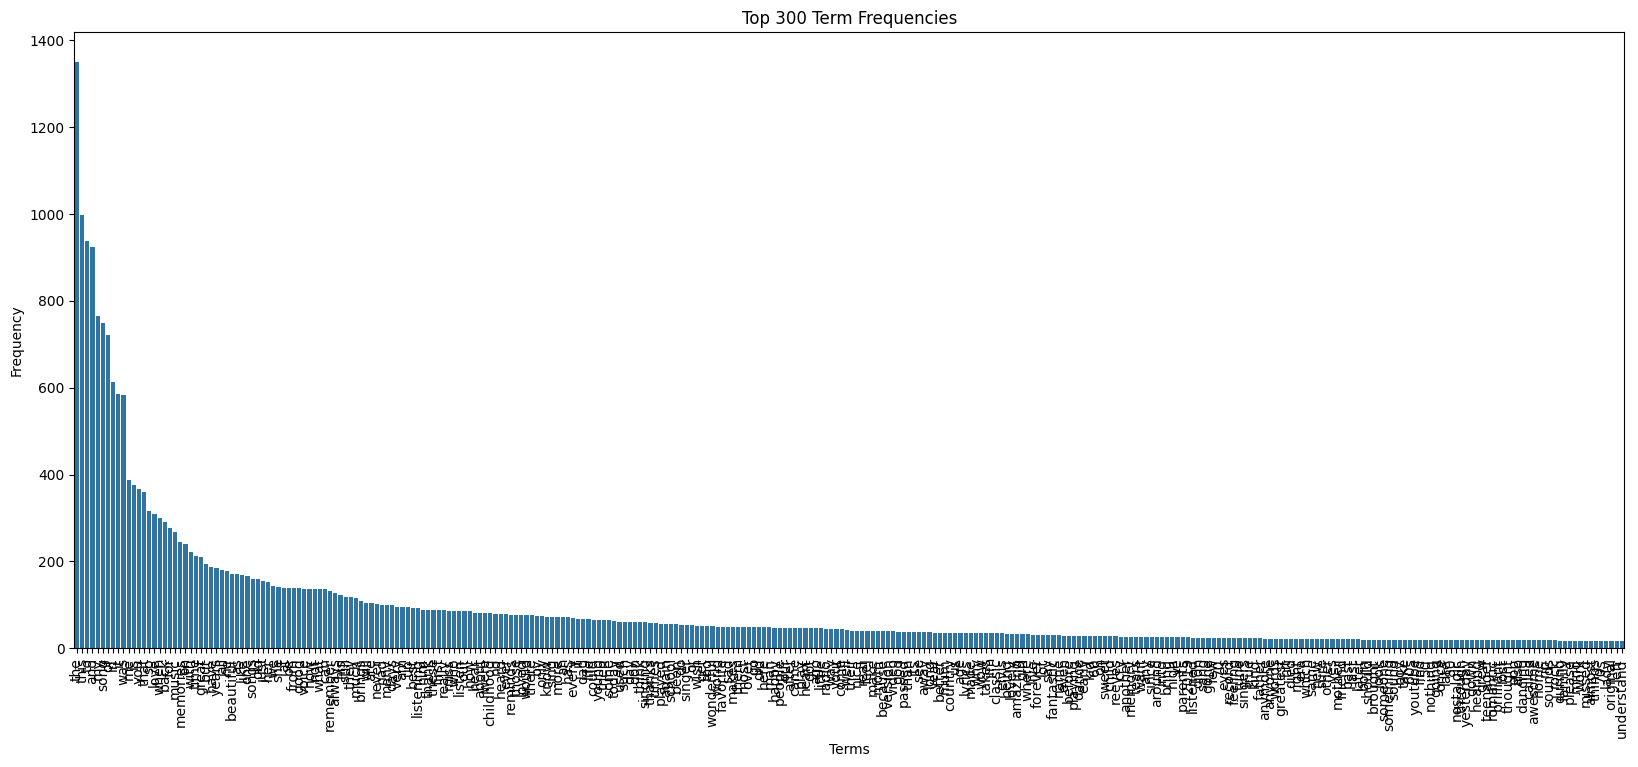

In [12]:
# Select top 300 terms by frequency
top_300_indices = term_frequencies.argsort()[-300:][::-1]
top_300_terms = count_vect.get_feature_names_out()[top_300_indices]
top_300_frequencies = term_frequencies[top_300_indices]

# Create Seaborn bar plot for the top 300 terms
plt.subplots(figsize=(20, 8))
g = sns.barplot(x=top_300_terms, y=top_300_frequencies)
g.set_xticklabels(top_300_terms, rotation=90)
plt.title("Top 300 Term Frequencies")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.show()

Top 50 Terms

In [13]:
# Interactive Plot with Plotly
top_50_indices = term_frequencies.argsort()[-50:][::-1]
top_50_terms = count_vect.get_feature_names_out()[top_50_indices]
top_50_frequencies = term_frequencies[top_50_indices]

# Plot with Plotly for interactivity
fig = go.Figure(data=[
    go.Bar(x=top_50_terms, y=top_50_frequencies)
])
fig.update_layout(
    title="Top 50 Term Frequencies (Ordered by Frequency)",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis=dict(tickangle=45),
    height=600,
    width=1000
)
fig.show()

Log Transformation of Term Frequencies

/var/folders/ms/g8m5jdns58d0rhhgbk1kj2wm0000gn/T/ipykernel_58260/2730365371.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



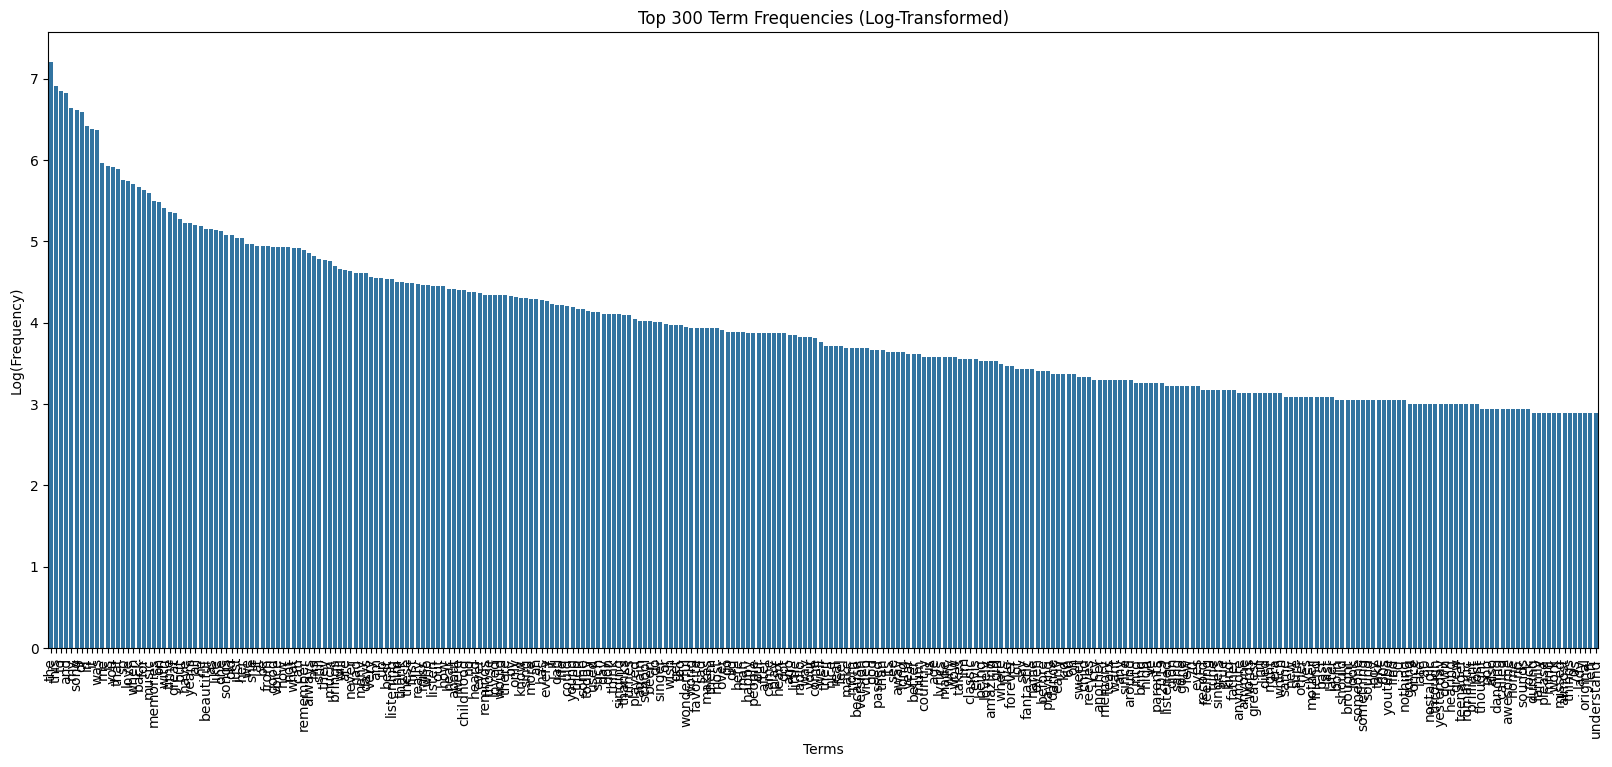

In [14]:
# Apply logarithmic scaling to the term frequencies
term_frequencies_log = [math.log(freq + 1) for freq in term_frequencies]  # Add 1 to avoid log(0)

# Visualize Top 300 Terms with Log Transformation in Seaborn
top_300_frequencies_log = [term_frequencies_log[i] for i in top_300_indices]

plt.subplots(figsize=(20, 8))
g = sns.barplot(x=top_300_terms, y=top_300_frequencies_log)
g.set_xticklabels(top_300_terms, rotation=90)
plt.title("Top 300 Term Frequencies (Log-Transformed)")
plt.xlabel("Terms")
plt.ylabel("Log(Frequency)")
plt.show()


##### Finding frequent patterns

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# Create Separate DataFrames for Each Sentiment Category
categories = df['sentiment'].unique() 
category_dfs = {}

for category in categories:
    # Filter the original DataFrame by sentiment category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Define Function to Create Term-Document Frequency DataFrame
def create_term_document_df(df):
    count_vect = CountVectorizer() 
    X_counts = count_vect.fit_transform(df['comment']) 
    
    # Extract the vocabulary (unique words)
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Generate Term-Document Frequency DataFrames for Each Category
term_document_dfs = {}  # Dictionary to store term-document DataFrames

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

Term-Document Frequency DataFrame for Category 'nostalgia':


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


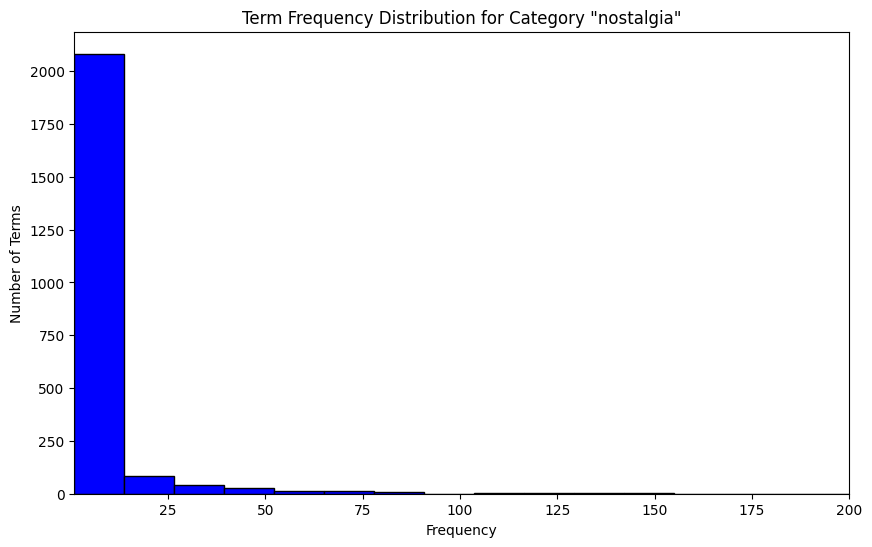

In [17]:
# Display Filtered DataFrame for One Category
category_number = 1  # Change this number to view a different category
print(f"Term-Document Frequency DataFrame for Category '{categories[category_number]}':")
display(term_document_dfs[categories[category_number]].head())

# Aggregate Word Counts for a Selected Category
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the Term Frequency Distribution for the Selected Category
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=50, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category "{categories[category_number]}"')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [18]:
category_number=1 #You can change it to 0 or 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['nicer', 'dc', 'if', 'ignore', 'ill', 'david', 'illicit', 'im', 'idea', 'images', 'imho', 'imitated', 'immediately', 'impeccable', 'impersonate', 'dark', 'impossible', 'imagine', 'deal', 'dean', 'iconized', 'hum', 'human', 'degrade', 'humming', 'defining', 'hums', 'hurry', 'dedicated', 'declined', 'decide', 'decent', 'decency', 'december', 'husbands', 'decca', 'ibm', 'death', 'danube', 'democrat', 'imprinted', 'danial', 'crying', 'cry', 'insane', 'cruise', 'cruel', 'crown', 'crossroads', 'crystal', 'crossed', 'inspire', 'crescendo', 'instantly', 'instead', 'instinctively', 'instructions', 'created', 'crop', 'cuban', 'innocent', 'cupcakes', 'incase', 'incredibly', 'dancers', 'incurable', 'india', 'damn', 'dairy', 'dads', 'daddy', 'industry', 'influential', 'infomercial', 'curtis', 'inhaling', 'curled', 'curious', 'innocence', 'in', 'hug', 'https', 'depending', 'divine', 'disturbing', 'distraction', 'hit', 'hitler', 'dis

In [19]:
category_number=1 #You can change it to 0 or 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['nicer', 'dc', 'if', 'ignore', 'ill', 'david', 'illicit', 'im', 'idea', 'images', 'imho', 'imitated', 'immediately', 'impeccable', 'impersonate', 'dark', 'impossible', 'imagine', 'deal', 'dean', 'iconized', 'hum']


In [20]:
category_number=0 #You can change it to 0 or 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_document_dfs[categories[category_number]]


Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,000,045,10,100,10m,11,12,14,15,150,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Frequent Pattern Mining

In [21]:
from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.dbStats import TransactionalDatabase as tds

In [22]:
# Convert term-document DataFrames to transactional databases
for category in term_document_dfs:
    category_safe = category.replace(' ', '_')
    
    # Create DenseFormatDF object and convert to transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001
Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


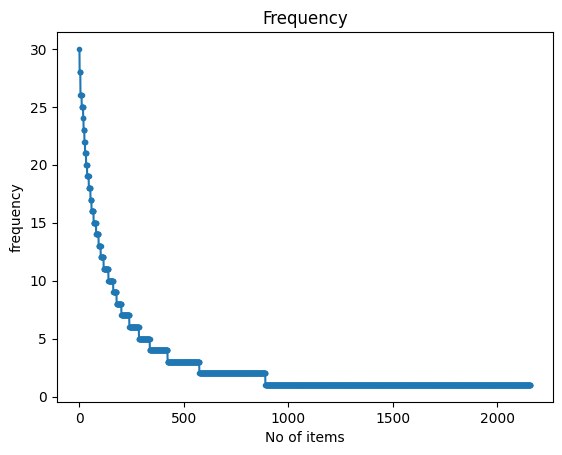

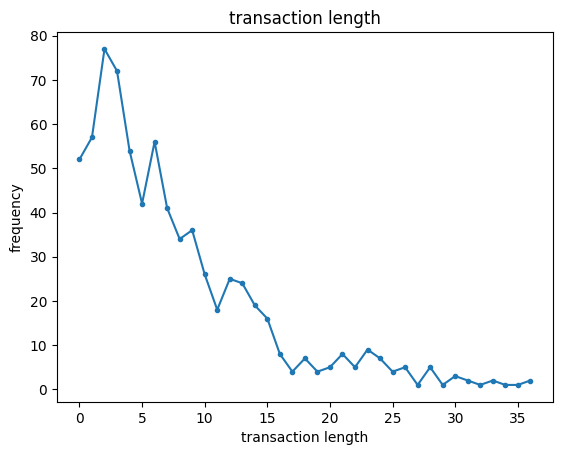

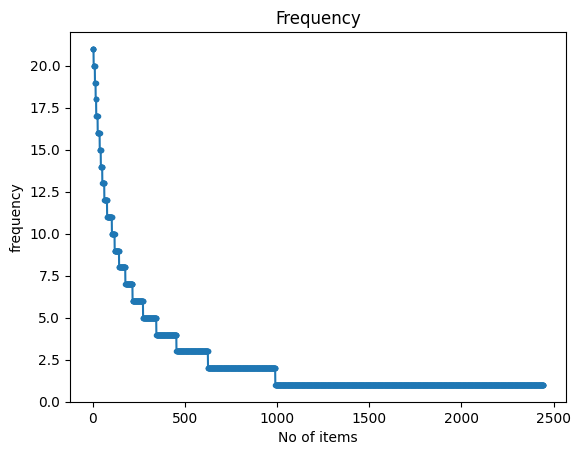

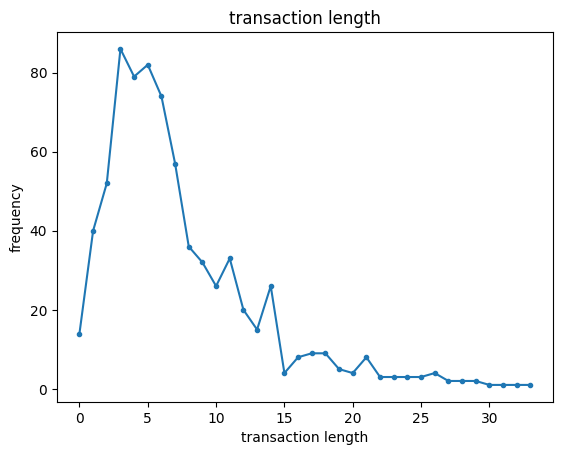

In [23]:
# Load and analyze the transactional databases for both categories
for category_file in ['td_freq_db_nostalgia.csv', 'td_freq_db_not_nostalgia.csv']:
    # Create TransactionalDatabase object for each category file
    obj = tds.TransactionalDatabase(category_file)
    
    # Run analysis
    obj.run()
    obj.printStats()  # Print database statistics
    obj.plotGraphs()  # Visualize transactional data

In [24]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# Set minimum support
minSup = 9

# Mine patterns for the 'nostalgia' category
obj_nostalgia = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj_nostalgia.mine()
frequentPatternsDF_nostalgia = obj_nostalgia.getPatternsAsDataFrame()
print('Total No of patterns for nostalgia: ' + str(len(frequentPatternsDF_nostalgia)))
print('Runtime for nostalgia: ' + str(obj_nostalgia.getRuntime()))
obj_nostalgia.save('freq_patterns_nostalgia_minSup9.txt')

frequentPatternsDF_nostalgia


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns for nostalgia: 180
Runtime for nostalgia: 0.008862972259521484


,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,will,28
178,go,28


In [25]:
# Mine patterns for the 'not nostalgia' category
obj_not_nostalgia = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj_not_nostalgia.mine()
frequentPatternsDF_not_nostalgia = obj_not_nostalgia.getPatternsAsDataFrame()
print('Total No of patterns for not nostalgia: ' + str(len(frequentPatternsDF_not_nostalgia)))
print('Runtime for not nostalgia: ' + str(obj_not_nostalgia.getRuntime()))

obj_not_nostalgia.save('freq_patterns_not_nostalgia_minSup9.txt')
frequentPatternsDF_not_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns for not nostalgia: 144
Runtime for not nostalgia: 0.0062389373779296875


,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,every,21
140,loved,21
141,classic,21
142,them,21


In [26]:
import pandas as pd

# Group DataFrames containing patterns for each category
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

# Identify patterns that appear in more than one category
pattern_counts = {}
for pattern_df in dfs:
    for pattern in pattern_df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one DataFrame
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(pattern_df) for pattern_df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# Filter each DataFrame to retain only unique patterns
filtered_dfs = []
for pattern_df in dfs:
    filtered_df = pattern_df[pattern_df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered DataFrames and sort by support
patterns_df = pd.concat(filtered_dfs, ignore_index=True)
patterns_df = patterns_df.sort_values(by='Support', ascending=False)

# Display the final result
print("Filtered patterns across categories:")
print(patterns_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")


Filtered patterns across categories:
     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the 'comment' column to a term-document matrix (TDM)
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['comment'])
terms = count_vect.get_feature_names_out()

# Tokenize comments into sets of unique words
df['tokenized_comment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix using the patterns from patterns_df
pattern_matrix = pd.DataFrame(0, index=df.index, columns=patterns_df['Patterns'])

# Check if each pattern is present in each comment
for pattern in patterns_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix for an augmented feature set
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

# Display the augmented feature set
augmented_df


,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using FAE Top-K and MaxFPGrowth algorithms (Only for Nostalgia)

In [28]:
from PAMI.frequentPattern.topk.FAE import FAE
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth
import pandas as pd

# Dictionary to store FAE Top-K and MaxFPGrowth results
fae_topk_results = {}
maxfp_results = {}

# Transactional database files for the nostalgia and not nostalgia categories
nostalgia_file = 'td_freq_db_nostalgia.csv'

# ---- FAE Top-K Algorithm ----
k_values = [500] #, 1000, 1500]
for k in k_values:
    fae_topk_nostalgia = FAE(iFile=nostalgia_file, k=k)
    fae_topk_nostalgia.mine()
    fae_patterns_nostalgia = fae_topk_nostalgia.getPatternsAsDataFrame()
    
    fae_topk_results[f'nostalgia_k_{k}'] = {
        "patterns": fae_patterns_nostalgia,
        "runtime": fae_topk_nostalgia.getRuntime()
    }
    
    print(f"\nFAE Top-K for 'nostalgia' with k={k}")
    print(f"Number of patterns: {len(fae_patterns_nostalgia)}")
    print(f"Runtime: {fae_topk_nostalgia.getRuntime()} seconds")
    print(fae_patterns_nostalgia.head())

# ---- MaxFPGrowth Algorithm ----
min_sup_values = [3]#, 6, 9]
for min_sup in min_sup_values:
    maxfp_nostalgia = MaxFPGrowth(iFile=nostalgia_file, minSup=min_sup, sep='\t')
    maxfp_nostalgia.mine()
    maxfp_patterns_nostalgia = maxfp_nostalgia.getPatternsAsDataFrame()
    
    maxfp_results[f'nostalgia_minSup_{min_sup}'] = {
        "patterns": maxfp_patterns_nostalgia,
        "runtime": maxfp_nostalgia.getRuntime()
    }
    
    print(f"\nMaxFPGrowth for 'nostalgia' with minSup={min_sup}")
    print(f"Number of patterns: {len(maxfp_patterns_nostalgia)}")
    print(f"Runtime: {maxfp_nostalgia.getRuntime()} seconds")
    print(maxfp_patterns_nostalgia.head())

 TopK frequent patterns were successfully generated using FAE algorithm.

FAE Top-K for 'nostalgia' with k=500
Number of patterns: 500
Runtime: 0.07169914245605469 seconds
   Patterns  Support
0  favorite       30
1      ever       28
2     would       28
3      will       28
4        go       28
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 

MaxFPGrowth for 'nostalgia' with minSup=3
Number of patterns: 682
Runtime: 0.023724794387817383 seconds
   Patterns  Support
0  skating         3
1   walker         3
2    scott         3
3  17 1987         3
4     stop         3


#### 3.5 Dimensionality Reduction

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [30]:
# Apply PCA, t-SNE, and UMAP to term-document matrix data (tdm_df)
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [31]:
# Define function to create scatter plots for 2D visualizations

# Define colors and categories for plotting
col = ['coral', 'blue']
categories = df['sentiment'].unique()  # Expect 'nostalgia' and 'not nostalgia'

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

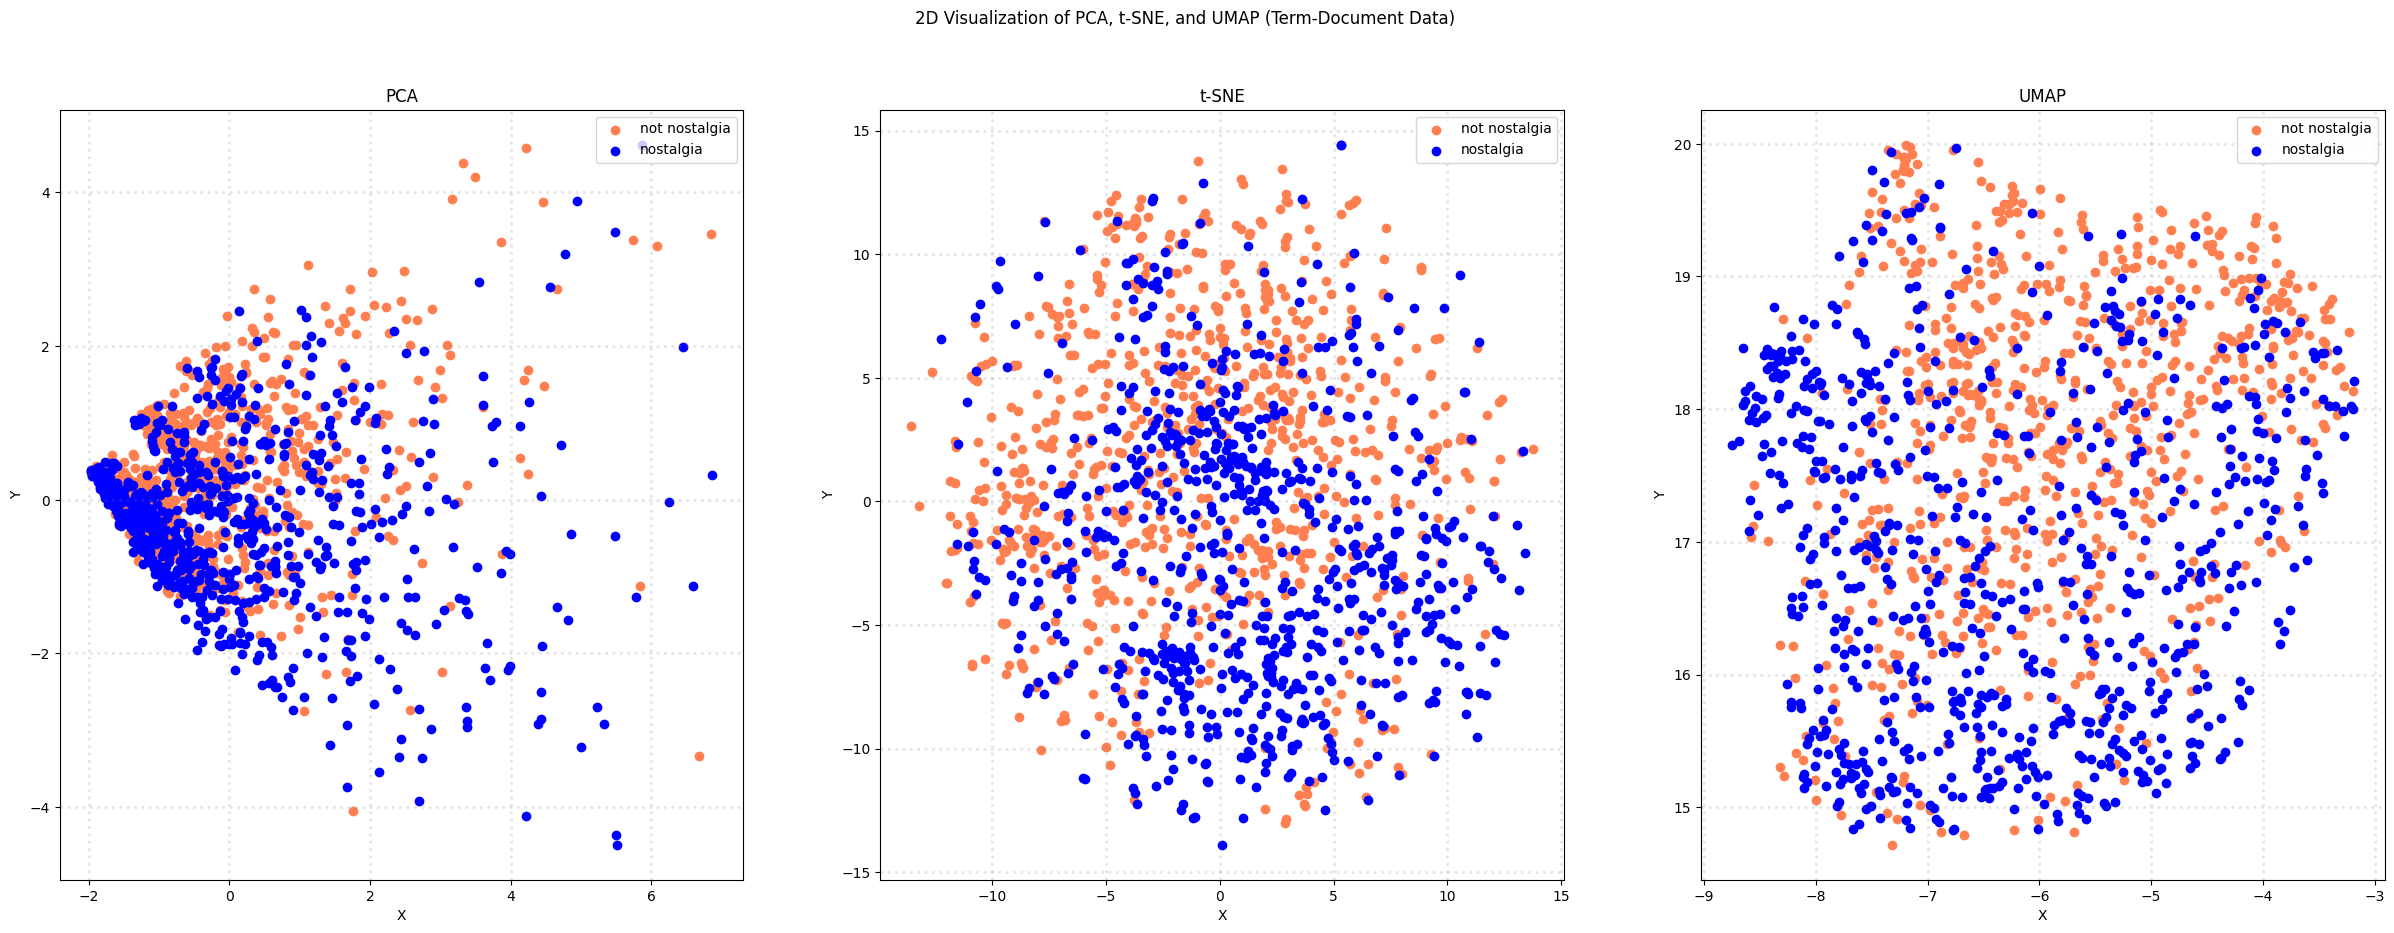

In [32]:
# Plot 2D scatter plots for PCA, t-SNE, and UMAP on term-document data
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('2D Visualization of PCA, t-SNE, and UMAP (Term-Document Data)')

plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')
plt.show()

In [33]:
# Apply PCA, t-SNE, and UMAP to the augmented data (augmented_df)
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

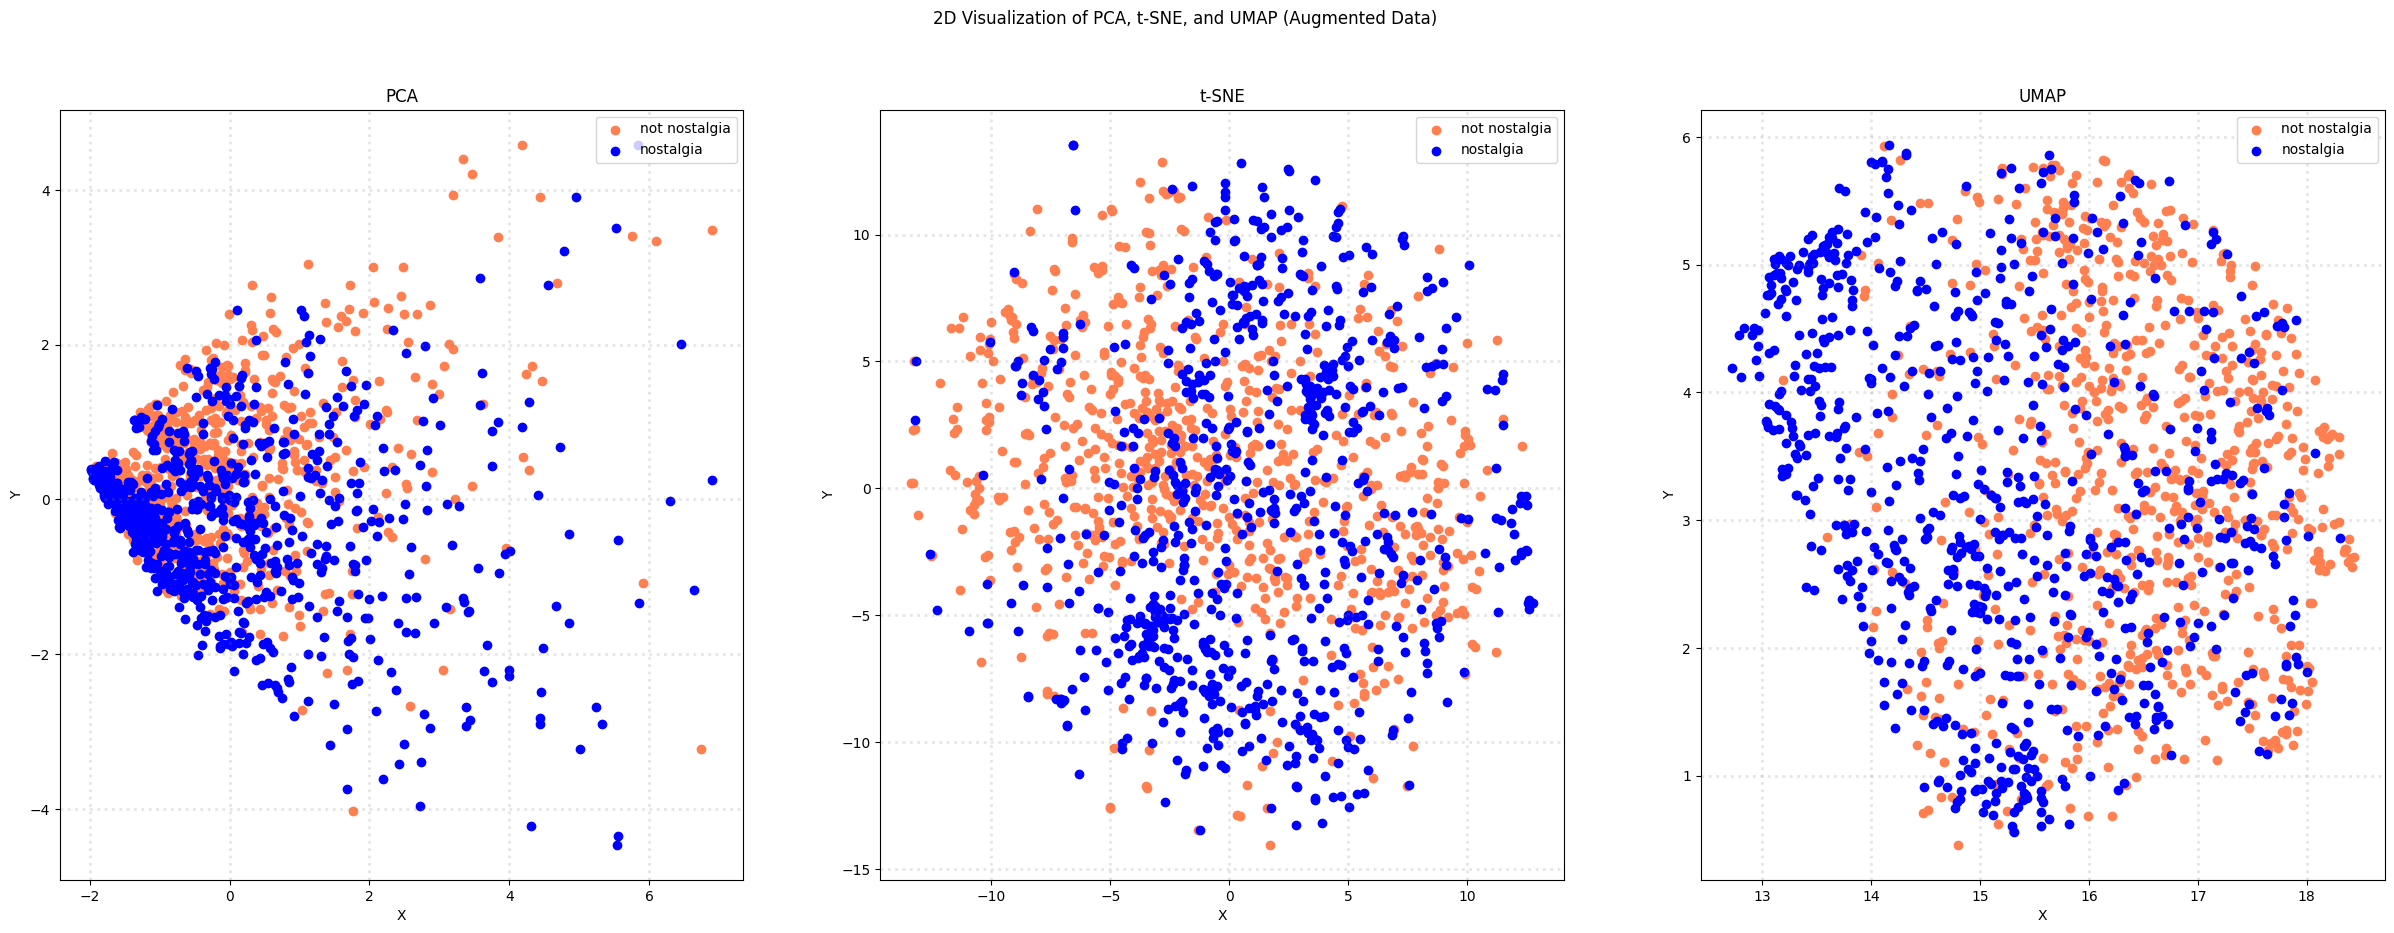

In [34]:
# Plot 2D scatter plots for PCA, t-SNE, and UMAP on augmented data
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('2D Visualization of PCA, t-SNE, and UMAP (Augmented Data)')

plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')
plt.show()

3D Visualization 

In [35]:
# Apply PCA, t-SNE, and UMAP to term-document data in 3D
X_pca_3dm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3dm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3dm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

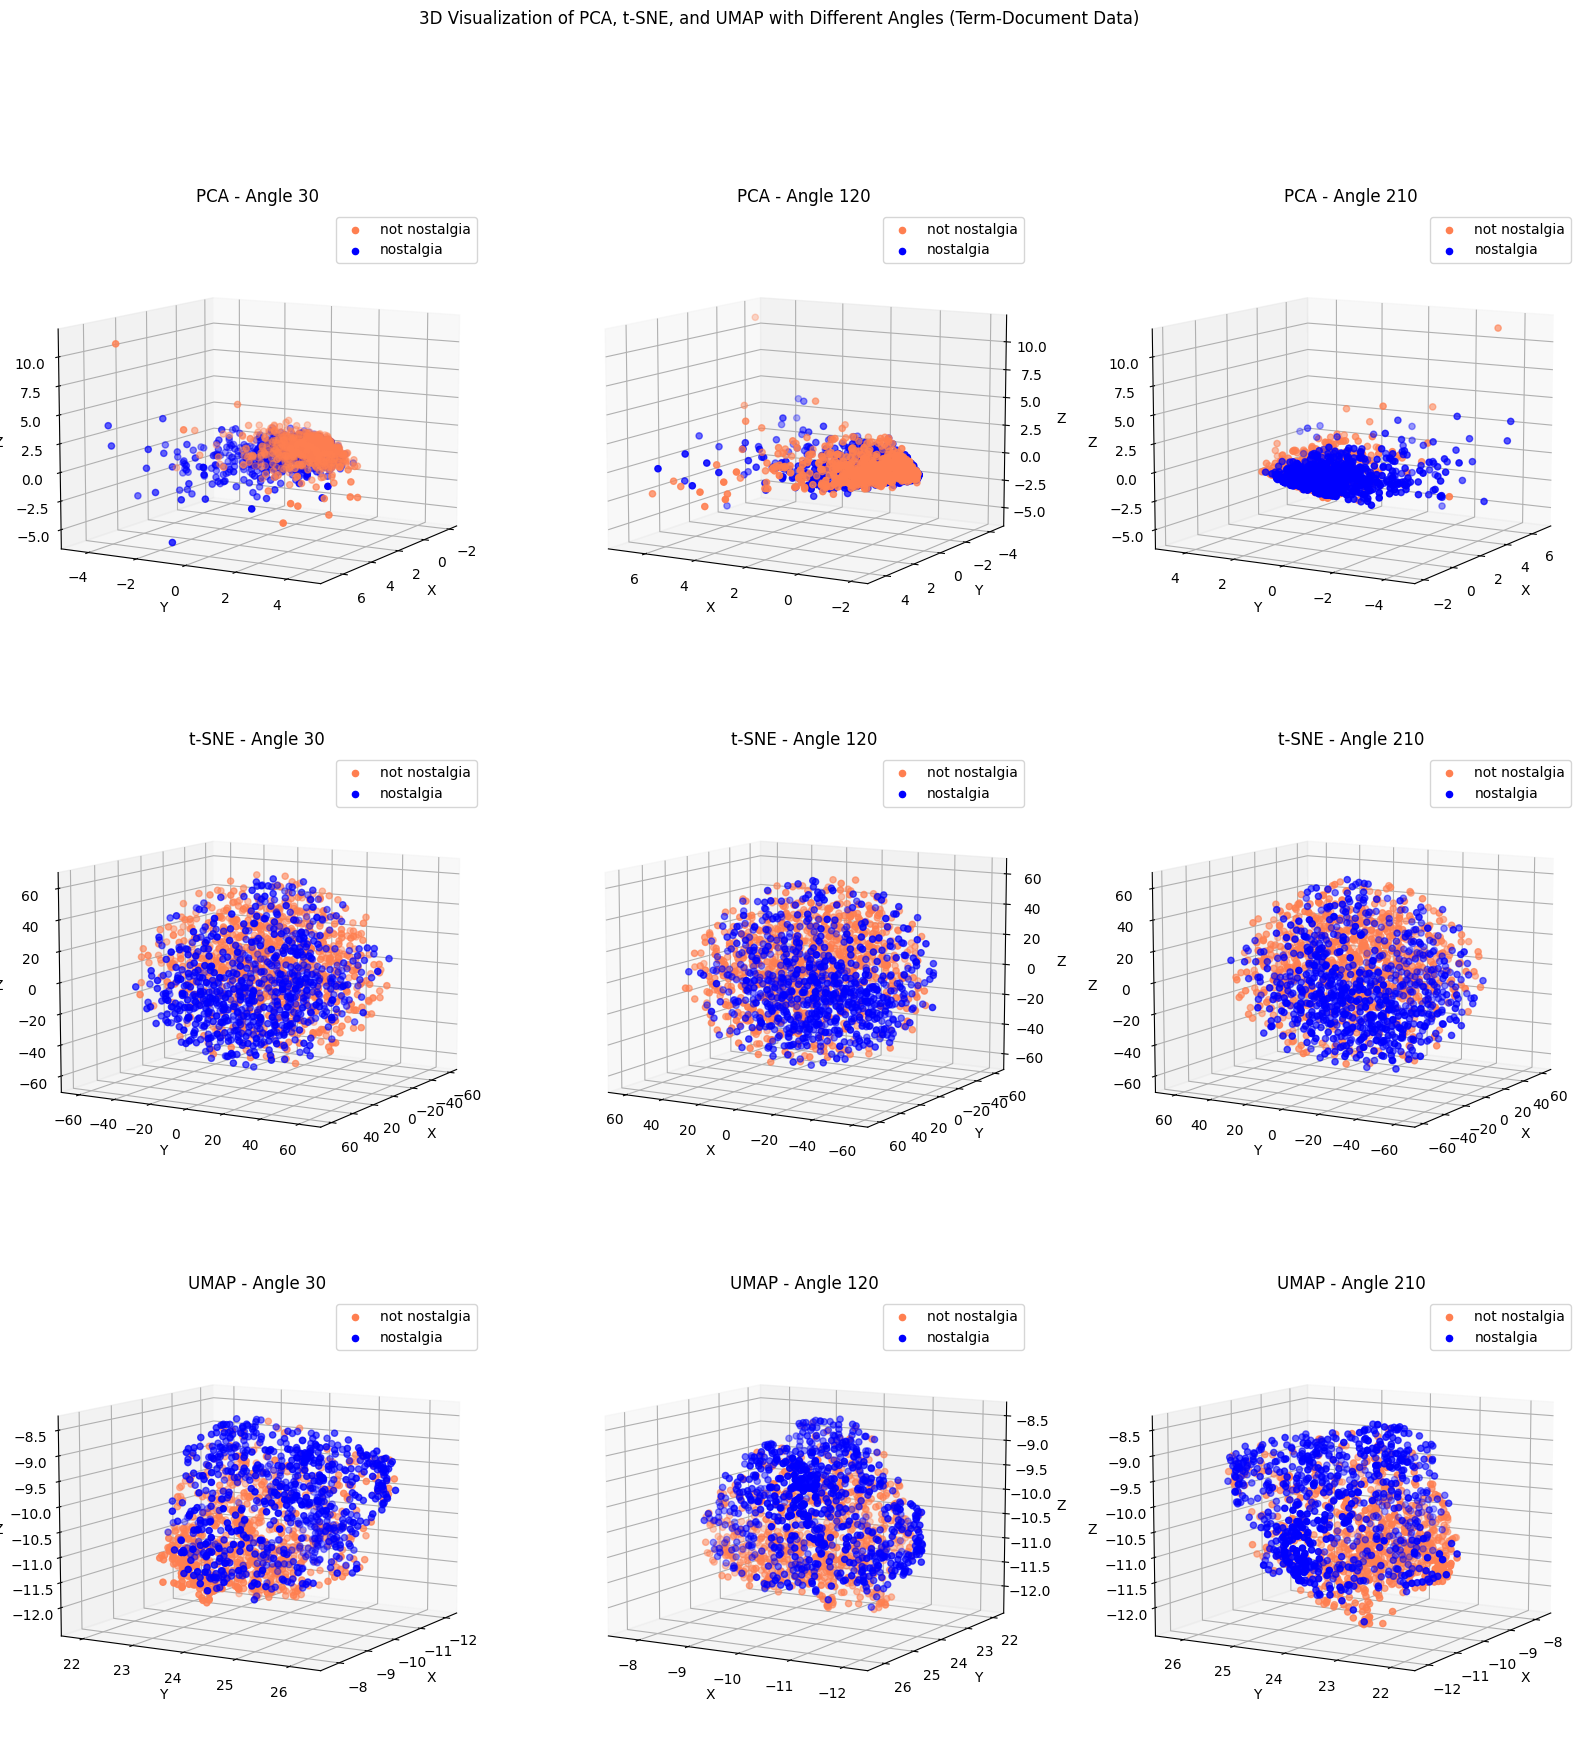

In [36]:
def plot_3d_scatter(ax, X_reduced, title, angle):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category][:, 0]
        ys = X_reduced[df['sentiment'] == category][:, 1]
        zs = X_reduced[df['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(elev=10, azim=angle)

# Plot PCA, t-SNE, and UMAP in 3D with different angles
fig = plt.figure(figsize=(20, 20))
angles = [30, 120, 210]
for i, (data, title) in enumerate(zip([X_pca_3dm, X_tsne_3dm, X_umap_3dm], ['PCA', 't-SNE', 'UMAP'])):
    for j, angle in enumerate(angles):
        ax = fig.add_subplot(3, 3, i*3 + j + 1, projection='3d')
        plot_3d_scatter(ax, data, f'{title} - Angle {angle}', angle)

plt.suptitle('3D Visualization of PCA, t-SNE, and UMAP with Different Angles (Term-Document Data)')
plt.show()

### 4. Discretization and Binarization

In [37]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [38]:
# Initialize LabelBinarizer for the 'sentiment' column
mlb = preprocessing.LabelBinarizer()
mlb.fit(df['sentiment'])

# Add a new column with the binarized 'sentiment' values
df['bin_sentiment'] = mlb.transform(df['sentiment']).tolist()

# Display the updated DataFrame with the binarized column
print(df[['sentiment', 'bin_sentiment']].head())


       sentiment bin_sentiment
0  not nostalgia           [1]
1      nostalgia           [0]
2      nostalgia           [0]
3  not nostalgia           [1]
4      nostalgia           [0]


### 5. Data Exploration

In [39]:
import numpy as np
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
#  Select 3 random comments for exploration
document_to_transform_1 = []
random_record_1 = df.iloc[50]
document_to_transform_1.append(random_record_1['comment'])

document_to_transform_2 = []
random_record_2 = df.iloc[100]
document_to_transform_2.append(random_record_2['comment'])

document_to_transform_3 = []
random_record_3 = df.iloc[150]
document_to_transform_3.append(random_record_3['comment'])

In [41]:
# Print the selected comments
print("Random Comment 1:", document_to_transform_1)
print("Random Comment 2:", document_to_transform_2)
print("Random Comment 3:", document_to_transform_3)

Random Comment 1: ['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
Random Comment 2: ['i guess most of us leave it too late before we tell someone just how much we really love them']
Random Comment 3: ['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [42]:
# Transform sentences with CountVectorizer
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors (0 for absence, 1 for presence of terms)
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Print binarized vectors
print("\nBinarized Count Vectors:")
print("Document 1 Binarized Vector:\n", document_vector_count_1_bin.toarray())
print("Document 2 Binarized Vector:\n", document_vector_count_2_bin.toarray())
print("Document 3 Binarized Vector:\n", document_vector_count_3_bin.toarray())


Binarized Count Vectors:
Document 1 Binarized Vector:
 [[0 0 0 ... 0 0 0]]
Document 2 Binarized Vector:
 [[0 0 0 ... 0 0 0]]
Document 3 Binarized Vector:
 [[0 0 0 ... 0 0 0]]


In [43]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3)

# Print Cosine Similarity Results
print("\nCosine Similarity Results:")
print("Cosine Similarity between Document 1 and Document 2: {:.6f}".format(cos_sim_count_1_2[0, 0]))
print("Cosine Similarity between Document 1 and Document 3: {:.6f}".format(cos_sim_count_1_3[0, 0]))
print("Cosine Similarity between Document 2 and Document 3: {:.6f}".format(cos_sim_count_2_3[0, 0]))

print("Cosine Similarity for Document 1 with itself: {:.6f}".format(cos_sim_count_1_1[0, 0]))
print("Cosine Similarity for Document 2 with itself: {:.6f}".format(cos_sim_count_2_2[0, 0]))
print("Cosine Similarity for Document 3 with itself: {:.6f}".format(cos_sim_count_3_3[0, 0]))



Cosine Similarity Results:
Cosine Similarity between Document 1 and Document 2: 0.032174
Cosine Similarity between Document 1 and Document 3: 0.027864
Cosine Similarity between Document 2 and Document 3: 0.000000
Cosine Similarity for Document 1 with itself: 1.000000
Cosine Similarity for Document 2 with itself: 1.000000
Cosine Similarity for Document 3 with itself: 1.000000


### 6. Data Classification

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [45]:
# Map sentiment labels to binary values
category_mapping = {'nostalgia': 1, 'not nostalgia': 0}

# Convert sentiment labels to binary format
df['category'] = df['sentiment'].map(category_mapping)

# Define target names
target_names = ['not nostalgia', 'nostalgia']

Model 1: Using the term-document frequency data

In [46]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['category'], test_size=0.3, random_state=42)

In [47]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy with Term-Document Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report with Term-Document Data:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy with Term-Document Data: 0.8688888888888889

Classification Report with Term-Document Data:
                precision    recall  f1-score   support

not nostalgia     0.9389    0.7788    0.8514       217
    nostalgia     0.8222    0.9528    0.8827       233

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



Model 2: Using the augmented data

In [48]:
# Split the augmented data into training and testing sets (70% train, 30% test)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, df['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier on the augmented data
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# Evaluate the classifier
print("\nAccuracy with Augmented Data:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report with Augmented Data:\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))



Accuracy with Augmented Data: 0.8644444444444445

Classification Report with Augmented Data:
                precision    recall  f1-score   support

not nostalgia     0.9333    0.7742    0.8463       217
    nostalgia     0.8185    0.9485    0.8787       233

     accuracy                         0.8644       450
    macro avg     0.8759    0.8613    0.8625       450
 weighted avg     0.8739    0.8644    0.8631       450



### 7. New Data Visualization

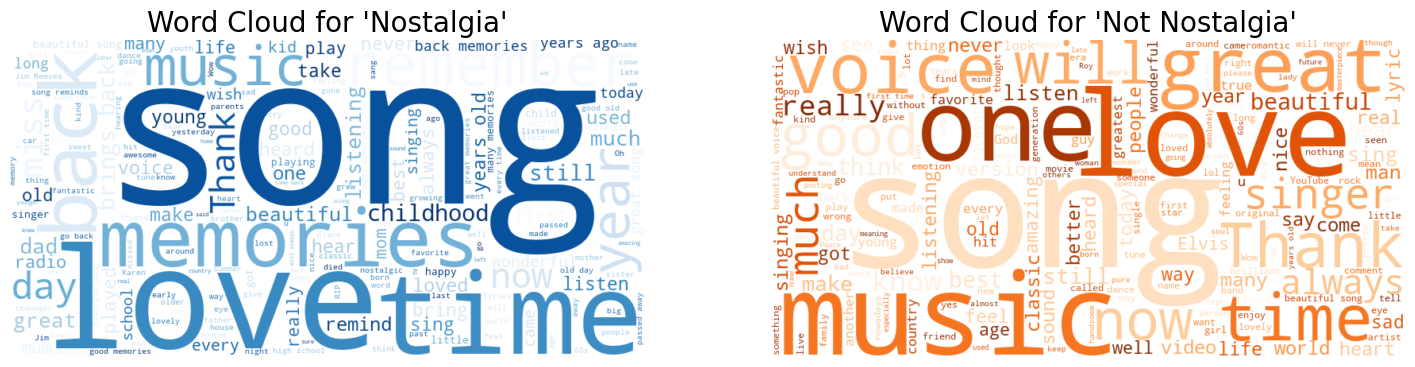

In [49]:
# pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate comments by sentiment
nostalgia_comments = ' '.join(df[df['sentiment'] == 'nostalgia']['comment'].values)
not_nostalgia_comments = ' '.join(df[df['sentiment'] == 'not nostalgia']['comment'].values)

# Generate word clouds
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Word cloud for nostalgia
wordcloud_nostalgia = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(nostalgia_comments)
axes[0].imshow(wordcloud_nostalgia, interpolation='bilinear')
axes[0].set_title("Word Cloud for 'Nostalgia'", fontsize=20)
axes[0].axis('off')

# Word cloud for not nostalgia
wordcloud_not_nostalgia = WordCloud(width=800, height=400, background_color='white', colormap='Oranges').generate(not_nostalgia_comments)
axes[1].imshow(wordcloud_not_nostalgia, interpolation='bilinear')
axes[1].set_title("Word Cloud for 'Not Nostalgia'", fontsize=20)
axes[1].axis('off')

plt.show()


### 8. TF-IDF Features

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
# Initialize the TfidfVectorizer
tfidf_vect = TfidfVectorizer()

# Fit and transform the 'comment' column to generate the TF-IDF document matrix
tfidf_matrix = tfidf_vect.fit_transform(df['comment'])

# Get the feature names (words)
feature_names = tfidf_vect.get_feature_names_out()

# Convert the matrix to a DataFrame for easier interpretation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the TF-IDF matrix
print("TF-IDF Document Matrix:")
print(tfidf_df.head())


TF-IDF Document Matrix:
    00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

   youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[5 rows x 3730 columns]


### 9. Simple Naive Bayes Classifier

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

Word Frequency Features (CountVectorizer)

In [ ]:
X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(tdm_df, df['category'], test_size=0.3, random_state=42)

# Initialize and train Multinomial Naive Bayes for word frequency
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_freq, y_train_freq)

# Predict and evaluate
y_pred_freq = multinomial_nb.predict(X_test_freq)
print("Multinomial Naive Bayes with Word Frequency Features")
print("Accuracy:", accuracy_score(y_test_freq, y_pred_freq))
print("\nClassification Report:\n", classification_report(y_test_freq, y_pred_freq, target_names=['not nostalgia', 'nostalgia']))

TF-IDF Features (TfidfVectorizer)

In [52]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_df, df['category'], test_size=0.3, random_state=42)

# Initialize and train Bernoulli Naive Bayes for TF-IDF
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train_tfidf, y_train_tfidf)

# Predict and evaluate
y_pred_tfidf = bernoulli_nb.predict(X_test_tfidf)
print("\nBernoulli Naive Bayes with TF-IDF Features")
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf, target_names=['not nostalgia', 'nostalgia']))


Multinomial Naive Bayes with Word Frequency Features
Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia       0.94      0.78      0.85       217
    nostalgia       0.82      0.95      0.88       233

     accuracy                           0.87       450
    macro avg       0.88      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450


Bernoulli Naive Bayes with TF-IDF Features
Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

not nostalgia       0.93      0.82      0.87       217
    nostalgia       0.85      0.94      0.89       233

     accuracy                           0.88       450
    macro avg       0.89      0.88      0.88       450
 weighted avg       0.89      0.88      0.88       450



#### Difference

As we can see from the output, BernoulliNB with TF-IDF (88.4%) slightly outperforms MultinomialNB with Word Frequency (86.9%). 

For the precision and recall:

`not nostalgia`
- `MultinomialNB` has a higher precision (0.94), but lower recall (0.78), this means that it correctly identifies many true "not nostalgia" records but misses some.
- `BernoulliNB` has a balanced precision (0.93) and higher recall (0.82), suggesting a more consistent identification of "not nostalgia" cases.

`nostalgia`
- `MultinomialNB` has a lower precision (0.82) but high recall (0.95), means that it captures most "nostalgia" records but has more false positives.
- `BernoulliNB` has a higher precision (0.85) with slightly lower recall (0.94), showing improved precision without much reduction in recall.

From this, we can say that the F1-Score of `MultinomialNB` has a weighted F1-score of 0.87, balanced by high recall but slightly lower precision in the "nostalgia" category. While ``** achieves a weighted F1-score of 0.88, which means that it benefits more balanced precision and recall, especially in the "not nostalgia" category.

### 10. Inefficent parts and how to improve the Data preprocessing

1. In the Text Cleaning and Tokenization, we the code only use simple string splitting for tokenization, which doesnt remove punctuation, ets. Instead, we could use `nltk` or `re` for tokenization.

In [53]:
import re
df['cleaned_text'] = df['comment'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

2. We didnt remoce stop words (common words) such as "the", "and", etc. This can prevent us to get more meaningful patterns. We can use Scikit-learn’s `TfidfVectorizer` or `CountVectorizer` with the `stop_words` parameter set to '`english`' or a custom list of stop words. Code snippet:

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words='english')

3. Stemming or lemmatization was not applied (words like "running" and "run" being treated as seperate terms). We can fix this by using `nltk`.

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

4. When handling duplicates, we only check based on exact text matches. We can improve this by checking semantics similarities to identify near duplicates. Or another method is to compute cosine similarity between TF-IDF vectors to flag similar comments.

5. Only unigrams (single words) are considered. Using only unigrams can miss out on valuable context provided by word pairs (bigrams) or triples (trigrams). To imptove this, Use `n_gram_range=(1, 2) or (1, 3)` in the vectorizers to capture n-grams. This was, we can get more meaningful features, especially for sentiment analysis.

In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')